<a href="https://colab.research.google.com/github/VastSea0/nasa-hackathon/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 44.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.5.0
    Uninstalling tenacity-8.5.0:
      Successfully uninstalled tenacity-8.5.0
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.9.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.9.0 which i

In [2]:
import earthaccess

# 1. Login
earthaccess.login()

Enter your Earthdata Login username: egehankahraman0
Enter your Earthdata password: ··········


In [3]:
results = earthaccess.search_data(
    cloud_hosted=False,
    short_name="GPM_3IMERGHH",
    temporal=("2025-05-30", "2025-10-01"), # Güncellenmiş tarih aralığı
    bounding_box=(26, 36, 45, 42)  # Türkiye: (lon_min, lat_min, lon_max, lat_max)
)

if results:
    print(f"Bulunan veri seti sayısı: {len(results)}")
    print("İlk veri seti bilgisi:")
    display(results[0]) # display kullanarak daha okunaklı çıktı alalım
else:
    print("Belirtilen kriterlere uygun veri seti bulunamadı.")

# fetch the data

Bulunan veri seti sayısı: 96
İlk veri seti bilgisi:


Collection: {'ShortName': 'GPM_3IMERGHH', 'Version': '07'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180.0, 'EastBoundingCoordinate': 180.0, 'NorthBoundingCoordinate': 90.0, 'SouthBoundingCoordinate': -90.0}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2025-05-30T00:00:00.000Z', 'EndingDateTime': '2025-05-30T00:29:59.999Z'}}
Size(MB): 7.972988128662109
Data: ['https://data.gesdisc.earthdata.nasa.gov/data/GPM_L3/GPM_3IMERGHH.07/2025/150/3B-HHR.MS.MRG.3IMERG.20250530-S000000-E002959.0000.V07B.HDF5']

Linke tıkla ve anlaşmayı kabul et

In [4]:
nsidc_url = "https://data.gesdisc.earthdata.nasa.gov/data/GPM_L3/GPM_3IMERGHH.07/2024/245/3B-HHR.MS.MRG.3IMERG.20240901-S003000-E005959.0030.V07B.HDF5"
lpcloud_url = "https://data.gesdisc.earthdata.nasa.gov/data/GPM_L3/GPM_3IMERGHH.07/2024/245/3B-HHR.MS.MRG.3IMERG.20240901-S003000-E005959.0030.V07B.HDF5"

session = earthaccess.get_requests_https_session()

In [5]:
headers = {"Range": "bytes=0-100"}
r = session.get(lpcloud_url, headers=headers)
r

<Response [206]>

In [6]:
fs = earthaccess.get_fsspec_https_session()

In [7]:
with fs.open(lpcloud_url) as f:
    data = f.read(100)
data

b'\x89HDF\r\n\x1a\n\x00\x00\x00\x00\x00\x08\x08\x00\x04\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff}\xb2\x82\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00OHDR'

In [8]:
%%time

import xarray as xr

files = earthaccess.open(results[0:2])

ds = xr.open_dataset(files[0], group="")
ds

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

CPU times: user 2.12 s, sys: 165 ms, total: 2.29 s
Wall time: 11.3 s


<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*
Attributes:
    FileHeader:  DOI=10.5067/GPM/IMERG/3B-HH/07;\nDOIauthority=http://dx.doi....
    FileInfo:    DataFormatVersion=7e;\nTKCodeBuildVersion=0;\nMetadataVersio...

In [10]:
import h5py
import xarray as xr # xarray'i de dahil edelim, belki açabiliriz

# Open the first dataset found in the results list using earthaccess.open()
# We will open only the first file for inspection
if results:
    print("Opening the first dataset using earthaccess.open()...")
    try:
        # Use results[0:1] to open only the first file
        file_objects = earthaccess.open(results[0:1])

        if file_objects:
            file_obj = file_objects[0]
            print(f"Accessed file object for the first result.")

            # Attempt to list groups and variables using h5py
            print("\nAttempting to list groups and variables using h5py...")
            try:
                with h5py.File(file_obj, 'r') as f:
                    print("Contents of the HDF5 file (via h5py.visit):")
                    def print_groups_and_datasets(name):
                        print(name)
                    f.visit(print_groups_and_datasets)

            except Exception as h5py_e:
                print(f"h5py failed to open the file object: {h5py_e}")
                print("Attempting to open with xarray (if applicable)...")
                # If h5py fails, try opening with xarray (though likely to fail based on previous attempts)
                try:
                    ds_modis = xr.open_dataset(file_obj, engine="h5netcdf") # or other relevant engine
                    print("\nOpened with xarray. Variables:")
                    for var in ds_modis.variables:
                        print(var)
                    display(ds_modis)

                except Exception as xarray_e:
                    print(f"xarray also failed to open the file object: {xarray_e}")
                    print("Could not open the file object with either h5py or xarray.")
            finally:
                 # Close the file object if it has a close method
                if hasattr(file_obj, 'close'):
                    file_obj.close()

        else:
            print("earthaccess.open() did not return any file objects.")
    except Exception as e:
        print(f"Error during file access with earthaccess.open(): {e}")
else:
    print("No search results found to open.")

Opening the first dataset using earthaccess.open()...


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Accessed file object for the first result.

Attempting to list groups and variables using h5py...
Contents of the HDF5 file (via h5py.visit):
Grid
Grid/Intermediate
Grid/Intermediate/IRinfluence
Grid/Intermediate/IRprecipitation
Grid/Intermediate/MWobservationTime
Grid/Intermediate/MWprecipSource
Grid/Intermediate/MWprecipitation
Grid/Intermediate/precipitationUncal
Grid/lat
Grid/lat_bnds
Grid/latv
Grid/lon
Grid/lon_bnds
Grid/lonv
Grid/nv
Grid/precipitation
Grid/precipitationQualityIndex
Grid/probabilityLiquidPrecipitation
Grid/randomError
Grid/time
Grid/time_bnds


In [15]:
!pip install cftime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.1 MB/s eta 0:00:00


In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np # numpy'ı import edelim, kullanabiliriz

# Open the first dataset found in the results list using earthaccess.open()
# Specify the group '/Grid' as the precipitation data is inside this group
if results:
    print("Opening the first dataset using earthaccess.open() and xarray...")
    try:
        # Use results[0:1] to open only the first file
        file_objects = earthaccess.open(results[0:1])

        if file_objects:
            file_obj = file_objects[0]
            print(f"Accessed file object for the first result.")

            # Attempt to open with xarray, specifying the '/Grid' group
            print("Attempting to open with xarray, specifying the '/Grid' group...")
            try:
                # Ensure the file_obj is seekable if needed by xarray/engine
                # Using engine="netcdf4" is common for HDF5 files that are also NetCDF4 compliant
                # or simply rely on default engine if possible. Let's try default first.
                # Based on previous h5py output, variables are under /Grid
                ds_gpm = xr.open_dataset(file_obj, group="/Grid")


                # Check if the 'precipitation' variable exists
                if 'precipitation' in ds_gpm.variables:
                    precipitation_data = ds_gpm['precipitation']

                    print("\nInspecting 'precipitation' variable dimensions:")
                    print(f"Dimensions: {precipitation_data.dims}")
                    print(f"Shape: {precipitation_data.shape}")


                    # Check the number of time steps
                    if 'time' in precipitation_data.dims and precipitation_data.shape[precipitation_data.dims.index('time')] > 1:
                        print("Multiple time steps found, plotting mean precipitation over time...")
                        plt.figure(figsize=(12, 6))
                        # Plot the mean precipitation over the spatial dimensions
                        precipitation_data.mean(dim=('lat', 'lon')).plot()
                        plt.title('Ortalama Yağış Zaman Serisi')
                        plt.xlabel('Zaman')
                        plt.ylabel('Ortalama Yağış')
                        plt.grid(True)
                        plt.show()
                    elif 'lat' in precipitation_data.dims and 'lon' in precipitation_data.dims:
                         # If only one time step or no time dimension, plot a spatial map
                        print("Plotting spatial map for the first time step...")
                        plt.figure(figsize=(10, 8))
                        # Select the first (and likely only) time step for the spatial plot
                        precipitation_data.isel(time=0).plot(cmap='Blues', cbar_kwargs={'label': 'Yağış (mm/hr)'})
                        plt.title('İlk Zaman Adımında Yağış Dağılımı')
                        plt.xlabel('Boylam')
                        plt.ylabel('Enlem')
                        plt.show()
                    else:
                         print("Neither time nor spatial dimensions (lat, lon) found for plotting.")


                else:
                    print("'precipitation' variable not found in the /Grid group.")

            except Exception as xarray_e:
                print(f"xarray failed to open the dataset from /Grid group: {xarray_e}")
                print("Please check the group name and variable name based on the h5py output.")
            finally:
                 # Close the file object if it has a close method
                if hasattr(file_obj, 'close'):
                    file_obj.close()


        else:
            print("No file objects were returned by earthaccess.open().")
    except Exception as e:
        print(f"Error during file access with earthaccess.open(): {e}")
else:
    print("No search results found to open.")

Opening the first dataset using earthaccess.open() and xarray...


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Accessed file object for the first result.
Attempting to open with xarray, specifying the '/Grid' group...
xarray failed to open the dataset from /Grid group: Failed to decode variable 'time': unable to decode time units 'seconds since 1980-01-06 00:00:00 UTC' with "calendar 'julian'". Try opening your dataset with decode_times=False or installing cftime if it is not installed.
Please check the group name and variable name based on the h5py output.


In [12]:
# Assuming ds_gpm is available from the previous execution of cell
if 'ds_gpm' in locals() and ds_gpm:
    print("Spatial coverage of the visualized data:")
    if 'lat' in ds_gpm.coords and 'lon' in ds_gpm.coords:
        print(f"Latitude range: {ds_gpm['lat'].min().values} to {ds_gpm['lat'].max().values}")
        print(f"Longitude range: {ds_gpm['lon'].min().values} to {ds_gpm['lon'].max().values}")
    elif 'latitude' in ds_gpm.coords and 'longitude' in ds_gpm.coords:
         print(f"Latitude range: {ds_gpm['latitude'].min().values} to {ds_gpm['latitude'].max().values}")
         print(f"Longitude range: {ds_gpm['longitude'].min().values} to {ds_gpm['longitude'].max().values}")
    else:
        print("Latitude and Longitude coordinates not found in ds_gpm.")

else:
    print("ds_gpm variable not found. Please ensure the cell opening the dataset was executed successfully.")

ds_gpm variable not found. Please ensure the cell opening the dataset was executed successfully.


In [13]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 63.2 MB/s eta 0:00:00


Opening the first dataset using earthaccess.open() and xarray...


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

Accessed file object for the first result.
Attempting to open with xarray, specifying the '/Grid' group...

Successfully subsetted data for Türkiye bounding box.


/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


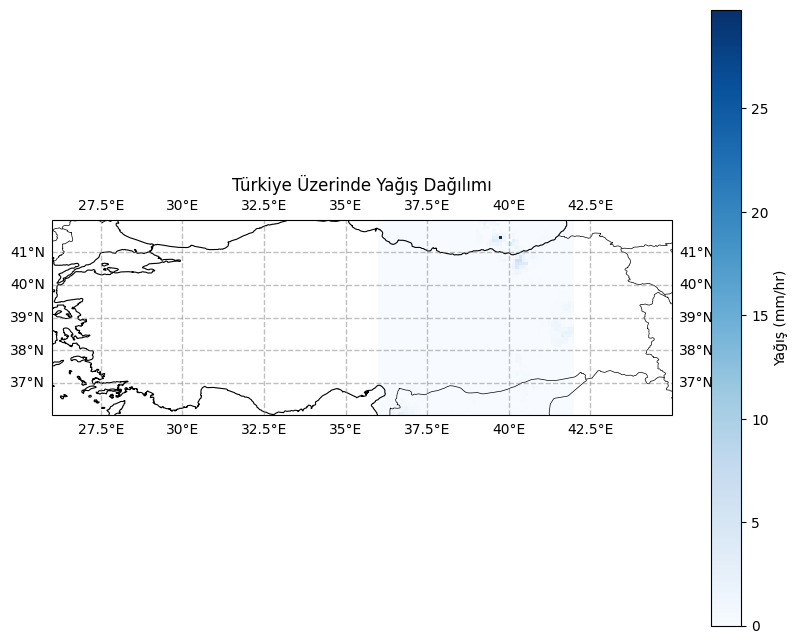

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Re-open the first dataset from results (assuming results is still available)
# Specify the group '/Grid'
if 'results' in locals() and results:
    print("Opening the first dataset using earthaccess.open() and xarray...")
    try:
        # Use results[0:1] to open only the first file
        file_objects = earthaccess.open(results[0:1])

        if file_objects:
            file_obj = file_objects[0]
            print(f"Accessed file object for the first result.")

            # Attempt to open with xarray, specifying the '/Grid' group
            print("Attempting to open with xarray, specifying the '/Grid' group...")
            try:
                ds_gpm = xr.open_dataset(file_obj, group="/Grid")

                # Check if the 'precipitation' variable exists
                if 'precipitation' in ds_gpm.variables:
                    precipitation_data = ds_gpm['precipitation']

                    # Define the Türkiye bounding box again (lon_min, lat_min, lon_max, lat_max)
                    # Using the same coordinates from k57kiY_Q4AjM
                    turkey_bbox = (26, 36, 45, 42)
                    lon_min, lat_min, lon_max, lat_max = turkey_bbox

                    # Select the data within the bounding box
                    # Note: xarray's .sel() might need coordinate names ('lon', 'lat')
                    # and the order might vary depending on the dataset.
                    # Assuming the data has 'lon' and 'lat' dimensions
                    try:
                        precipitation_subset = precipitation_data.sel(
                            lon=slice(lon_min, lon_max),
                            lat=slice(lat_min, lat_max)
                        )
                        print("\nSuccessfully subsetted data for Türkiye bounding box.")

                        # Plot the subsetted data on a map
                        plt.figure(figsize=(10, 8))
                        ax = plt.axes(projection=ccrs.PlateCarree())
                        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

                        # Add coastlines and borders
                        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
                        ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5)

                        # Plot the precipitation data subset.
                        # Use origin='lower' if lat/lon are increasing from bottom left
                        # Use cmap='Blues' for precipitation
                        precipitation_subset.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'label': 'Yağış (mm/hr)'})

                        # Add gridlines
                        ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

                        plt.title('Türkiye Üzerinde Yağış Dağılımı')
                        plt.show()

                    except Exception as subset_e:
                        print(f"Error subsetting or plotting data: {subset_e}")
                        print("Please check if coordinate names are 'lon' and 'lat' and their ranges.")


                else:
                    print("'precipitation' variable not found in the /Grid group.")

            except Exception as xarray_e:
                print(f"xarray failed to open the dataset from /Grid group: {xarray_e}")
                print("Please check the group name and variable name based on the h5py output.")
            finally:
                 # Close the file object if it has a close method
                if hasattr(file_obj, 'close'):
                    file_obj.close()


        else:
            print("No file objects were returned by earthaccess.open().")
    except Exception as e:
        print(f"Error during file access with earthaccess.open(): {e}")
else:
    print("results variable not found. Please run the search cell first.")

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

KeysView(Frozen({'CLDPRS': <xarray.Variable (time: 24, lat: 361, lon: 576)> Size: 20MB
[4990464 values with dtype=float32]
Attributes:
    long_name:       cloud_top_pressure
    units:           Pa
    fmissing_value:  1000000000000000.0
    standard_name:   cloud_top_pressure
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15], 'CLDTMP': <xarray.Variable (time: 24, lat: 361, lon: 576)> Size: 20MB
[4990464 values with dtype=float32]
Attributes:
    long_name:       cloud_top_temperature
    units:           K
    fmissing_value:  1000000000000000.0
    standard_name:   cloud_top_temperature
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0
    valid_range:     [-1.e+15  1.e+15], 'DISPH': <xarray.Variable (time: 24, lat: 361, lon: 576)> Size: 20MB
[4990464 values with dtype=float32]
Attributes:
    long_name:       zero_plane_displacement_height
    units:           m
    fmissing_value: 

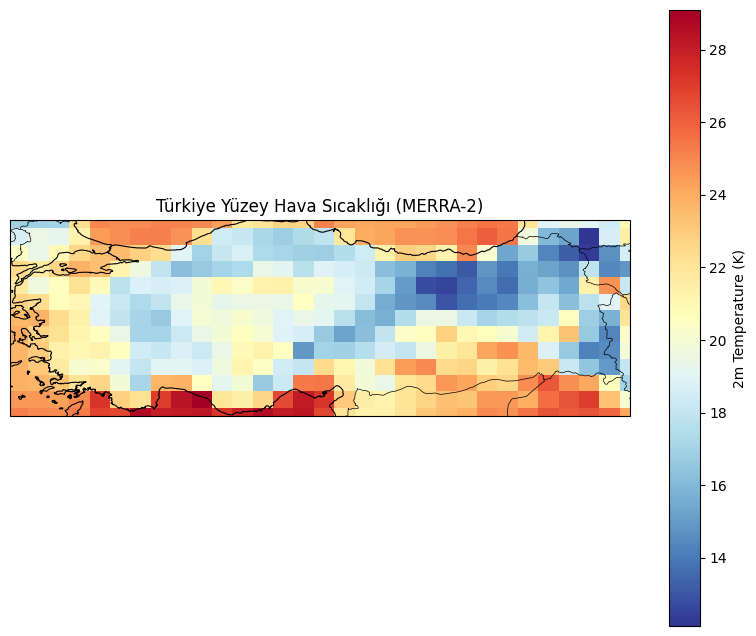

In [22]:
import earthaccess
import xarray as xr

results_temp = earthaccess.search_data(
    short_name="M2T1NXSLV",  # 1-hourly single level diagnostics
    cloud_hosted=True,
    temporal=("2025-09-01", "2025-10-2"),  # örnek tarih aralığı
    bounding_box=(26, 36, 45, 42)  # Türkiye sınırları
)

file_objects_temp = earthaccess.open(results_temp[0:1])

ds_temp = xr.open_dataset(file_objects_temp[0])

# Değişkenleri listele
print(ds_temp.variables.keys())

# 2 metre sıcaklığı
temp2m = ds_temp["T2M"].sel(
    lon=slice(26, 45),
    lat=slice(36, 42)
) - 273.15

# Türkiye sınırlarında subset al
temp_subset = temp2m.sel(lon=slice(26, 45), lat=slice(36, 42))

temperature_c = ds_temp["T2M"].sel(
    lon=slice(26, 45),
    lat=slice(36, 42)
) - 273.15


# İlk zaman dilimi için çizelim
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([26, 45, 36, 42])

ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

temp_subset.isel(time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap="RdYlBu_r",
    cbar_kwargs={'label': '2m Temperature (K)'}
)

plt.title('Türkiye Yüzey Hava Sıcaklığı (MERRA-2)')
plt.show()
